#                 SALES PREDICTION USING PYTHON

I'll first load and inspect the dataset to understand its structure and contents.

Data Exploration: Check for missing values, data types, and correlations between features.

Data Preprocessing: Clean the data (handle missing values, remove outliers, or scale/normalize features if necessary).

Feature Selection: Select important features that are likely to influence sales (e.g., advertising expenditure).

Splitting the Data: Split the dataset into training and testing sets.

Model Selection: Use a regression algorithm (e.g., Linear Regression) to train the model.

Model Evaluation: Evaluate the model's performance using metrics like Mean Squared Error (MSE) or R-squared.

In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/advertising.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


(      TV  Radio  Newspaper  Sales
 0  230.1   37.8       69.2   22.1
 1   44.5   39.3       45.1   10.4
 2   17.2   45.9       69.3   12.0
 3  151.5   41.3       58.5   16.5
 4  180.8   10.8       58.4   17.9,
 None)

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('advertising.csv')

# Display the first few rows and get info about the dataset
print(data.head())
print(data.info())


      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('advertising.csv')

# Feature Selection (assuming the dataset has columns like 'TV', 'Radio', 'Newspaper', and 'Sales')
X = data[['TV', 'Radio', 'Newspaper']]  # Independent variables (advertising expenditure)
y = data['Sales']  # Dependent variable (sales)

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Display the coefficients
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")


Mean Squared Error: 2.9077569102710896
R-squared: 0.9059011844150826
Coefficients: [0.05450927 0.10094536 0.00433665]
Intercept: 4.714126402214127


**Explanation**:

Data Splitting: The data is split into training and test sets using train_test_split.

Linear Regression: We use LinearRegression() from sklearn to fit the model.

Model Evaluation: We evaluate the model's performance using MSE and R-squared.

**Check correlations**: Analyze how each feature correlates with the target variable (sales) using correlation matrices or heatmaps.

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


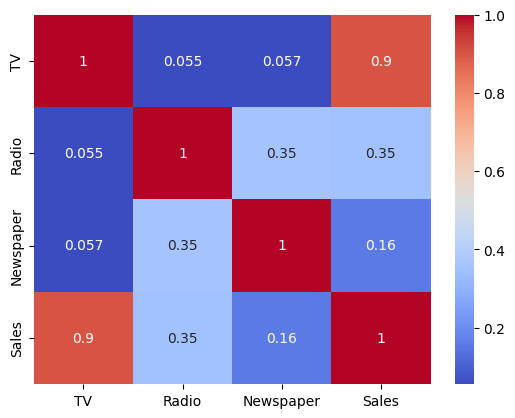

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for missing values
print(data.isnull().sum())

# Correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


**Data Preprocessing:**

Handling Outliers: Use techniques like boxplots to identify and remove outliers, as they can affect model performance.

Feature Scaling: Depending on the model, scaling your features might be necessary (e.g., using StandardScaler).

In [5]:
# Identifying outliers using IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers (rows outside 1.5*IQR range)
data_clean = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]


# Feature Engineering:

In [6]:
# Interaction terms
data['TV_Radio'] = data['TV'] * data['Radio']
data['TV_Newspaper'] = data['TV'] * data['Newspaper']


# Train-Test Split:

In [7]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Decision Tree
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Random Forest
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)


# Hyperparameter Tuning:

In [9]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=forest_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation score: 0.9322958172761056


# Model Evaluation:

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 2.9077569102710896
R-squared: 0.9059011844150826


In [11]:
# Compare MSE and R2 across models
mse_tree = mean_squared_error(y_test, y_pred_tree)
mse_forest = mean_squared_error(y_test, y_pred_forest)

r2_tree = r2_score(y_test, y_pred_tree)
r2_forest = r2_score(y_test, y_pred_forest)

print(f"Decision Tree MSE: {mse_tree}, R2: {r2_tree}")
print(f"Random Forest MSE: {mse_forest}, R2: {r2_forest}")


Decision Tree MSE: 2.74225, R2: 0.911257204436088
Random Forest MSE: 1.4374328500000009, R2: 0.9534827934927883


In [12]:
import joblib

# Save the model
joblib.dump(forest_model, 'sales_prediction_model.pkl')


['sales_prediction_model.pkl']

# Model Comparison

In [13]:
# Comparing performance of multiple models
models = {'Linear Regression': model, 'Decision Tree': tree_model, 'Random Forest': forest_model}
for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - MSE: {mse:.3f}, R²: {r2:.3f}")


Linear Regression - MSE: 2.908, R²: 0.906
Decision Tree - MSE: 2.742, R²: 0.911
Random Forest - MSE: 1.437, R²: 0.953


In [14]:
from sklearn.model_selection import GridSearchCV

# Example for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=forest_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Use the best model from the search
best_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")


Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}


In [15]:
data['TV_Radio'] = data['TV'] * data['Radio']


# Model Deployment with Streamlit

In [16]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 7.6 MB/s eta 0:00:00


In [17]:
import streamlit as st
import joblib
import pandas as pd

# Load the model
model = joblib.load('sales_prediction_model.pkl')

# Streamlit app
st.title('Sales Prediction App')

# Input fields
tv_spend = st.number_input('TV Spend', min_value=0)
radio_spend = st.number_input('Radio Spend', min_value=0)
newspaper_spend = st.number_input('Newspaper Spend', min_value=0)

# Prediction
if st.button('Predict Sales'):
    prediction = model.predict([[tv_spend, radio_spend, newspaper_spend]])
    st.write(f"Predicted Sales: {prediction[0]:.2f}")


2024-10-23 05:41:35.789 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-23 05:41:36.365 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-10-23 05:41:36.369 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-23 05:41:36.371 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-23 05:41:36.374 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-23 05:41:36.376 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-23 05:41:36.378 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-23 05:41:36.380 Session state does not 

# Visualization: Actual vs Predicted Sales

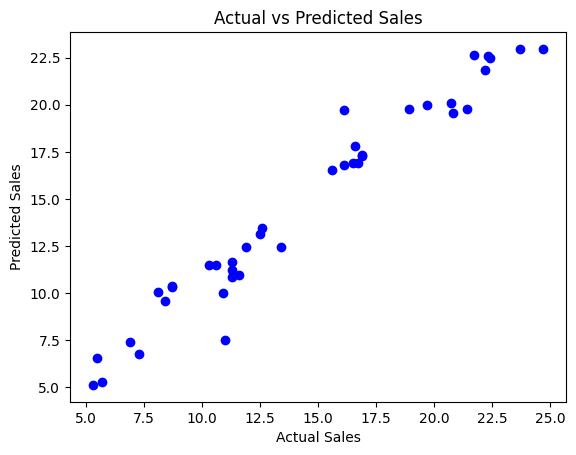

In [18]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()
